<a href="https://www.kaggle.com/code/lakshmipriya190803/hate-speech-detection?scriptVersionId=158064294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Loading all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import math
from wordcloud import WordCloud,STOPWORDS

## Loading and exploring the dataset 

In [2]:
df = pd.read_csv("/kaggle/input/hate-speech-detection-curated-dataset/HateSpeechDatasetBalanced.csv")

df.head(5)

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726119 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  726119 non-null  object
 1   Label    726119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


In [4]:
print(f"Does the dataset contain any null value ? {df.isnull().sum()}")

Does the dataset contain any null value ? Content    0
Label      0
dtype: int64


#### Lets explore the class distribution of the two classes

In [5]:
X, y = df['Content'], df['Label']
#train, test split
print(f"We will split the data into training and testing 80/20")
train_split = int(0.8 * X.shape[0])
#print(train_split)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

We will split the data into training and testing 80/20


((580895,), (580895,), (145224,), (145224,))

In [6]:
classes, class_count = np.unique(y_train, return_counts = True)
print(f"total number of training examples : {len(y_train)}")
print(f"total number of classes : {len(classes)}")

total number of training examples : 580895
total number of classes : 2


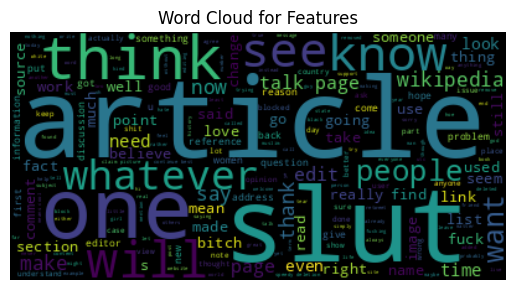

In [7]:
text1 = ' '.join(X_train.astype(str).tolist())

wordcloud = WordCloud().generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Features")
plt.show()

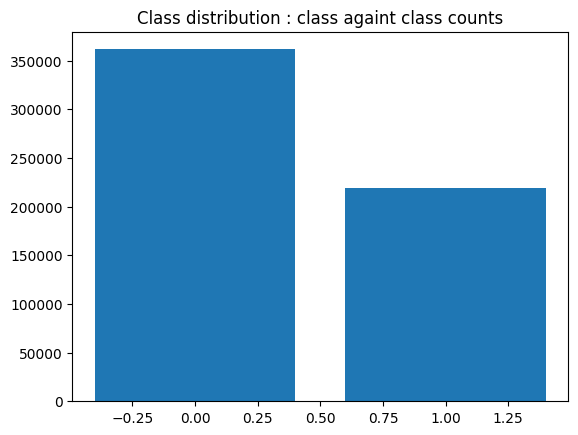

In [8]:
def plotting (x, y):
    plt.title("Class distribution : class againt class counts")
    plt.bar(x, y)
    plt.show()
labels = [0, 1]
plotting(labels, class_count)

### Creating Models and Exploring Further